<a href="https://colab.research.google.com/github/TrybinD/educational-projects/blob/main/Neural%20networks/%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BE%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

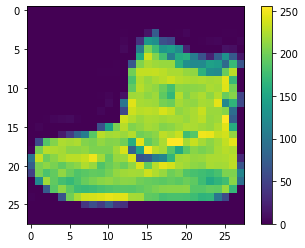

In [ ]:
plt.imshow(train_images[0])
plt.colorbar()

In [ ]:
train_images = train_images/255
test_images = test_images/255

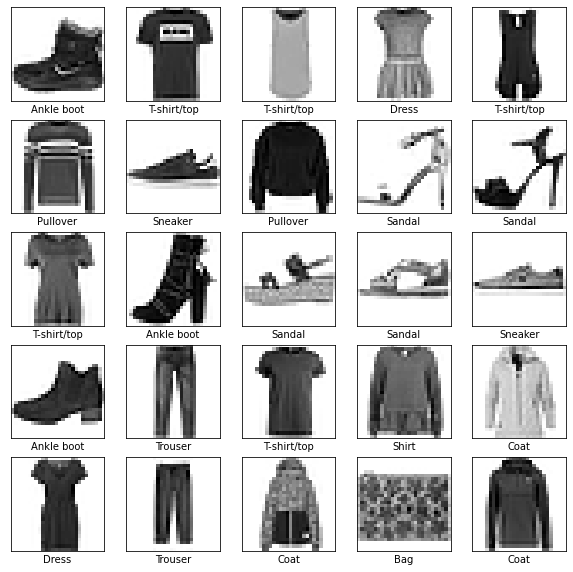

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3953 - accuracy: 0.8711
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3075 - accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2737 - accuracy: 0.8982
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2637 - accuracy: 0.9012
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9054
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2441 - accuracy: 0.9083
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2370 - accuracy: 0.9107
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2300 - accuracy: 0.9126
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.222

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8880


(0.3368937075138092, 0.8880000114440918)

In [ ]:
proba_model = tf.keras.Sequential([
                                   model,
                                   tf.keras.layers.Softmax()
])

In [ ]:
predictions = proba_model.predict(test_images)

In [ ]:
predictions[0]

array([3.2466713e-10, 2.3455944e-12, 2.0585675e-10, 2.6967272e-11,
       1.9644797e-09, 4.3824297e-05, 1.2864766e-08, 2.9460865e-03,
       2.6301057e-11, 9.9700999e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

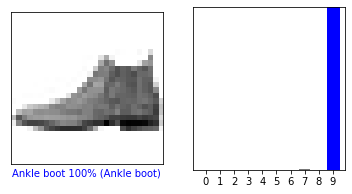

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)

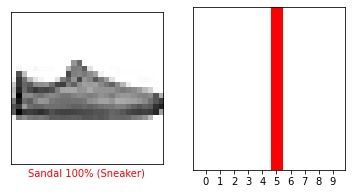

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  test_labels)

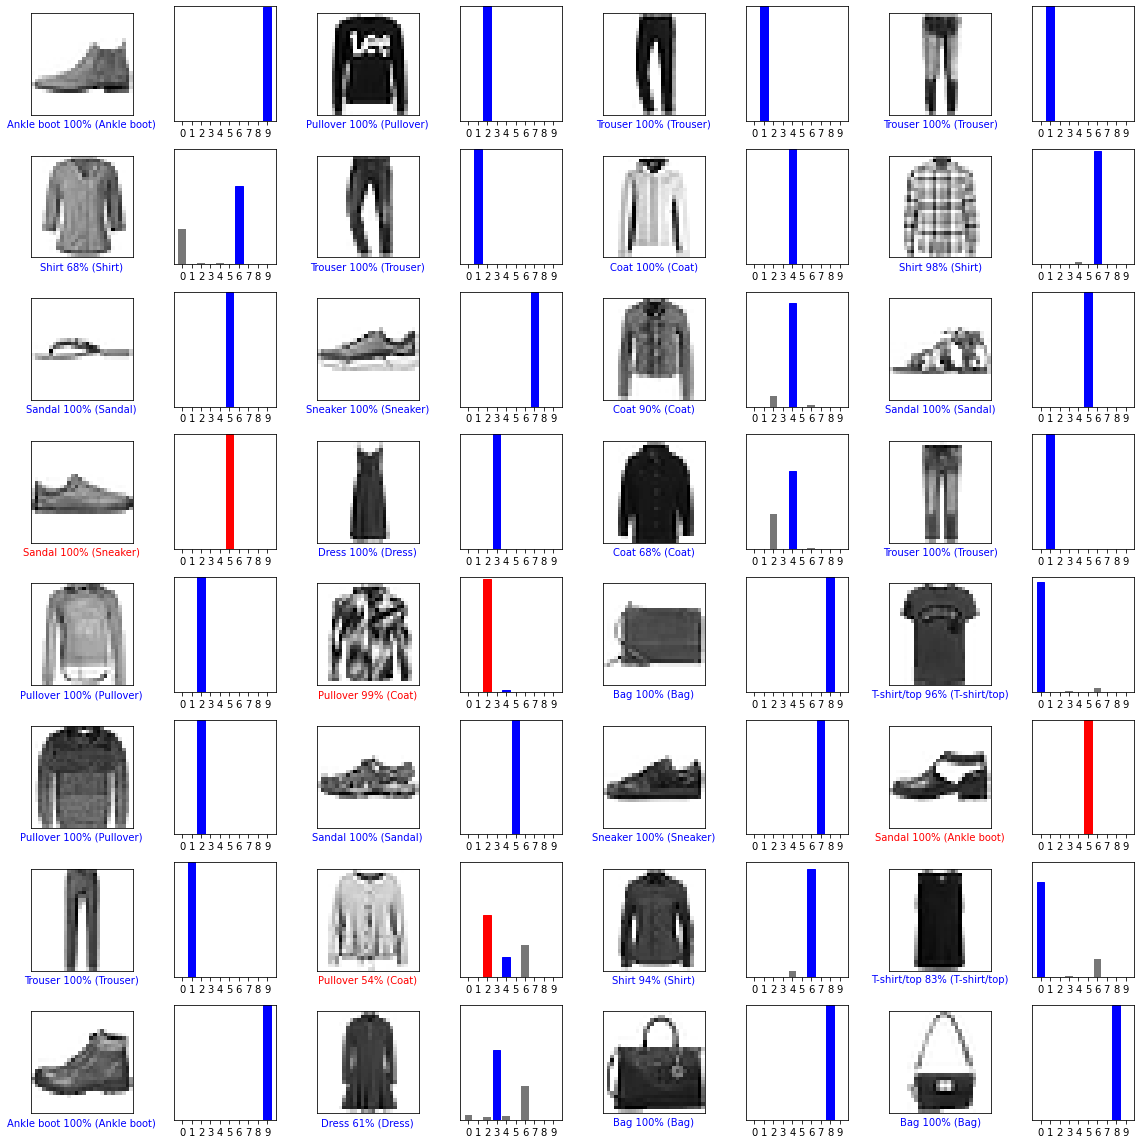

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(128, 3),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [ ]:
train_images = train_images[...,tf.newaxis]
test_images = test_images[...,tf.newaxis]

In [ ]:
model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 184s 98ms/step - loss: 0.3779 - accuracy: 0.8644
Epoch 2/5
1875/1875 [==============================] - 183s 98ms/step - loss: 0.3067 - accuracy: 0.8859
Epoch 3/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2654 - accuracy: 0.9022
Epoch 4/5
1875/1875 [==============================] - 183s 97ms/step - loss: 0.2374 - accuracy: 0.9114
Epoch 5/5
1875/1875 [==============================] - 182s 97ms/step - loss: 0.2104 - accuracy: 0.9217


In [ ]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 [==============================] - 6s 19ms/step - loss: 0.4410 - accuracy: 0.8746


(0.4410388767719269, 0.8745999932289124)

In [ ]:
predictions2 = proba_model2.predict(test_images)